# Introduction to Classes

## Object Oriented Programming (OOP)

Why use classes?
1. *Inheritance*
2. *Composition*

Let's imagine a robot that makes pizzas... the `PizzaRobot` class
1. It inherits robot-like properties (from the generic idea of a robot... *C3P0* anyone?)
2. It is composed of collections of parts that enable it to do its job
___

## Classes are very useful

* Multiple instances:
  * The `PizzaRobot` class is a factory, we can make as many pizza robots as we want
* Customisable:
  * Through inheritance, we can easily make a `CalzonePizzaRobot` class
___

## Let's make a simple class called `User`

In [45]:
class User(object): # make the new *User* class
    def setname(self, who): # add some attributes: 1. a function/method
        self.name = who #                          2. a string

In [46]:
user1 = User() # instantiation of a new *User* object

In [47]:
user1.name

AttributeError: 'User' object has no attribute 'name'

In [48]:
user1.setname('Jose')
user1.name

'Jose'

In [49]:
user2 = User()  # <- a second instance of `User`
user2.setname('Ana')
user2.name

'Ana'

In [51]:
class User(object):
    '''
    A User class
    Methods:
      setname : set name of user
      setage : set age of user
    '''
    def setname(self, who):
        '''Set attribute `name` to string `who`
        '''
        assert isinstance(who, str), \
            'string expected for *who* but got %s' % type(who)
        self.name = who
    
    def setage(self, how_old):
        '''Set attribute `age` to string `how_old`
        '''
        assert isinstance(how_old, int), \
            'string expected for *how_old* but got %s' % type(how_old)
        self.age = how_old

In [54]:
user1 = User()
user1.setname('Marc')
user1.setage(43)

user1.name, user1.age

('Marc', 43)

## What if we want *name* and *age* to be set when we instantiate the class?

In [55]:
class User(object):
    '''
    A User class
    '''
    def __init__(self, who, how_old): # __init__ is a class method, called a *constructor*
        self.name = who
        self.age = how_old

In [56]:
user1 = User('Jose', 29)
user2 = User('Maria', 33) # <- a second instance of `User`

In [58]:
user2.name

'Maria'

___
# These are the basics for classes...


A few links:
* https://docs.python.org/2/tutorial/classes.html#class-objects
* https://www.jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/
* https://julien.danjou.info/blog/2013/guide-python-static-class-abstract-methods

# Exercise: work in groups of 2 or 3 people:

1. In Python OOP, there are two kinds of object: *class* objects and *instance* objects.
  * Can you give an example of each from this lesson
  ___
2. Think of and discuss how *classes* might be useful in your work (5-10 minutes)

# Example of a class for working with ROMS grid files

In [37]:
from netCDF4 import Dataset
import numpy as np

class RomsGrid(object):
    """Class for working with ROMS grid files
    """
    def __init__(self, path, gridfile):
        self.path = path
        self.gridfile = gridfile
        self._lon = None
        self._lat = None
        self._h = None
        self._f = None
        self._rmask = None
    
    def _read_nc(self, var):
        with Dataset(self.path + self.gridfile) as nc:
            return nc.variables[var][:]
    
    def lon(self):
        if self._lon is None:
            self._lon = self._read_nc('lon_rho')
        return self._lon
    
    def lat(self):
        if self._lat is None:
            self._lat = self._read_nc('lat_rho')
        return self._lat
    
    def h(self):
        if self._h is None:
            self._h = self._read_nc('h')
        return self._h
    
    def rmask(self):
        if self._rmask is None:
            self._rmask = self._read_nc('mask_rho')
        return self._rmask

            
            

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

path1 = '/Users/emason/runs2009/na_2009_7pt5/'
path2 = '/Users/emason/runs2009/cb_2009_3km/'
path3 = '/Users/emason/runs2009/gc_2009_1km_60/'

file1 = 'roms_grd_NA2009_7pt5km.nc'
file2 = 'cb_2009_3km_grd_smooth.nc'
file3 = 'gc_2009_1km_grd_smooth.nc'


grid_1 = RomsGrid(path1, file1)
grid_2 = RomsGrid(path2, file2)
grid_3 = RomsGrid(path3, file3)

In [39]:
grid_1.lon();

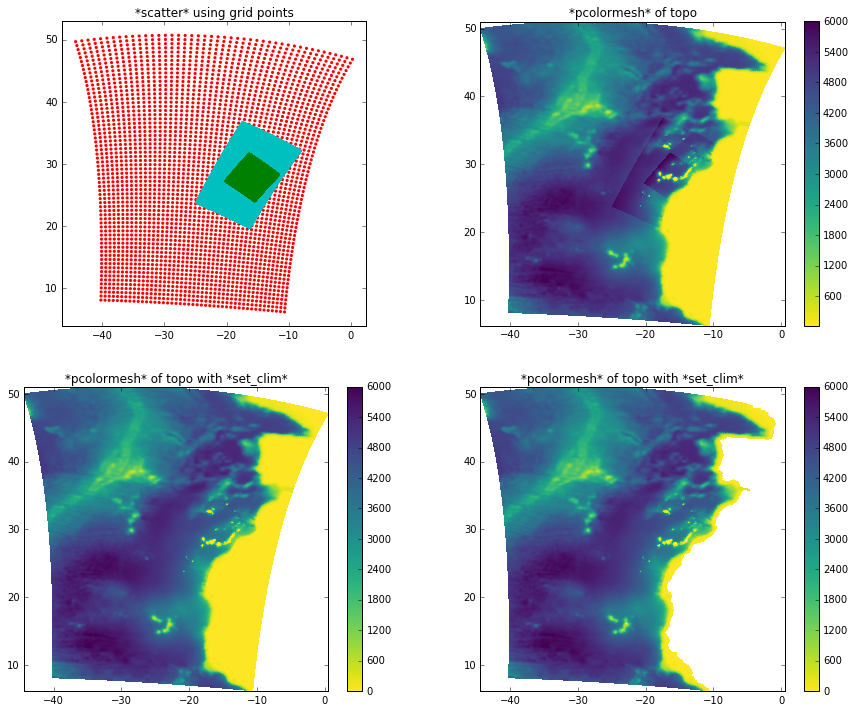

In [44]:
# Set the colormap
cmap = plt.cm.viridis_r

fig = plt.figure(1, (15, 12))

ax = fig.add_subplot(221)
ax.set_title('*scatter* using grid points')
ax.scatter(grid_1.lon()[::10, ::10], grid_1.lat()[::10, ::10], s=10, c='r', edgecolors='none')
ax.scatter(grid_2.lon(), grid_2.lat(), s=5, c='c', edgecolors='none')
ax.scatter(grid_3.lon(), grid_3.lat(), s=5, c='g', edgecolors='none')
ax.axis('image')

ax = fig.add_subplot(222)
ax.set_title('*pcolormesh* of topo')
pcm1 = ax.pcolormesh(grid_1.lon(), grid_1.lat(), grid_1.h(), cmap=cmap)
pcm2 = ax.pcolormesh(grid_2.lon(), grid_2.lat(), grid_2.h(), cmap=cmap)
pcm3 = ax.pcolormesh(grid_3.lon(), grid_3.lat(), grid_3.h(), cmap=cmap)
ax.axis('image')
plt.colorbar(pcm1)

# Standardise the color limits
ax = fig.add_subplot(223)
ax.set_title('*pcolormesh* of topo with *set_clim*')
pcm1 = ax.pcolormesh(grid_1.lon(), grid_1.lat(), grid_1.h(), cmap=cmap)
pcm2 = ax.pcolormesh(grid_2.lon(), grid_2.lat(), grid_2.h(), cmap=cmap)
pcm3 = ax.pcolormesh(grid_3.lon(), grid_3.lat(), grid_3.h(), cmap=cmap)
pcm1.set_clim(0, 6000)
pcm2.set_clim(0, 6000)
pcm3.set_clim(0, 6000)
ax.axis('image')
plt.colorbar(pcm1)

# Mask the land
h1 = np.ma.masked_where(grid_1.rmask() == 0, grid_1.h())
h2 = np.ma.masked_where(grid_2.rmask() == 0, grid_2.h())
h3 = np.ma.masked_where(grid_3.rmask() == 0, grid_3.h())

ax = fig.add_subplot(224)
ax.set_title('*pcolormesh* of topo with land mask')
pcm1 = ax.pcolormesh(grid_1.lon(), grid_1.lat(), h1, cmap=cmap)
pcm2 = ax.pcolormesh(grid_2.lon(), grid_2.lat(), h2, cmap=cmap)
pcm3 = ax.pcolormesh(grid_3.lon(), grid_3.lat(), h3, cmap=cmap)
pcm1.set_clim(0, 6000)
pcm2.set_clim(0, 6000)
pcm3.set_clim(0, 6000)
ax.axis('image')
plt.colorbar(pcm1)

# Exercises

### `User` class
1.  In the notebook, rewrite and expand the `User` class so that it has two (or more if you want) methods in addition to *setname* and *setage*
2.  In the notebook, test that your modified `User` class works correctly
3.  Copy and paste the `User` class to a .py file
4.  Open ipython

Now, try to import the `User` class to your ipython session (if you don't know how, maybe *Google* will help)


### `RomsGrid` class
1.  In the notebook make a scatter plot of the three grids, but the land points should be masked
    * Can you make the colours of the points correspond to the depth?


2.  In the notebook make a pcolormesh plot of the `grid_3` topography; explore the different `matplotlib` colormap options and choose one you like
    * Add some isobaths at 100, 300 and 500 m (google `matplotlib` to find out how to do this)
    * Add some labels pointing to any physical features that you know